## Q1. Your views about the problem statement?

The problem statement is clear and well-defined. The goal is to create a machine learning model to predict rainfall. This is a challenging task, as rainfall is influenced by a variety of factors, including temperature, humidity, wind speed, and pressure. However, I believe that it is possible to create a model that can predict rainfall with reasonable accuracy.

## Q2. What will be your approach to solving this task?

My approach to solving this task will be to use a variety of classification models, including decision trees and ensemble methods. I will first load the data and perform data preprocessing. Then, I will train and evaluate each model using a cross-validation approach. Finally, I will select the best model based on its accuracy and performance on the test set.

## Q3. What were the available ML model options you had to perform this task?

There are a variety of ML models that can be used to predict rainfall. Some of the most popular models include:


- **Logistic regression:** A statistical model that uses a logistic function to model the probability of an event occurring.
- **K-nearest neighbors (KNN):** A non-parametric model that classifies new data points based on the majority vote of their k nearest neighbors in the training data.
- **Decision trees:** A tree-like structure that represents a series of decisions that are used to classify new data points.
- **Random forests:** An ensemble model that combines multiple decision trees to improve accuracy.
- **Gradient boosting machines:** An ensemble model that combines multiple weak learners to improve accuracy.
- **Gaussian naive Bayes:** A probabilistic model that assumes that the features of the data are normally distributed.
- **Multinomial naive Bayes:** A probabilistic model that assumes that the features of the data are multinomially distributed.
- **Binomial naive Bayes:** A probabilistic model that assumes that the features of the data are binomially distributed.



## Creating a Rainfall Prediction Model: A Systematic Approach
 **Performing Exploratory Data Analysis (EDA)**
- **Data Understanding:**
  - Begin by thoroughly understanding the provided rainfall dataset, including its structure, columns, and the meaning of each variable. Gain insights into the data's distribution, summary statistics, and potential outliers.

- **Data Preprocessing:**
  - Handle Missing Values: Identify and address missing data by imputation or removal, ensuring that data is complete.
  - Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.
  - Convert Categorical Data: Transform categorical variables (e.g., "Location" and "Month") into numerical format.
  - Feature Selection: Use statistical techniques such as correlation analysis to select the most relevant features for rainfall prediction.
 
 **Model Selection:**
    - Choose different classification models (e.g., Logistic Regression, K-Nearest Neighbors, Decision Trees, Random Forests) to build and evaluate the predictive models.

- **Model Training and Evaluation:**
    - Split the dataset into training and testing sets to train the models and assess their performance.
    - Use appropriate evaluation metrics like Accuracy and F1-score to measure the model's accuracy.
    - Experiment with different hyperparameters for each model and use cross-validation to avoid overfitting.

- **Model Comparison:**
    - Compare the performance of different models and select the one with the best accuracy and generalization.

- **Further Improvement:**
    - Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and ensemble methods.

# Import Librery 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score, accuracy_score 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Disable all warnings
warnings.filterwarnings("ignore")

In [3]:
# read excel file 
df = pd.read_excel('sydney_rain prediction.xlsx')

In [4]:
# to see the dataframe
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes


In [5]:
# see the rows and column in dataframe
df.shape

(3337, 17)

In [6]:
# see the all info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [7]:
# to see the null value present in dataset
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [8]:
# drop null values
df.dropna(subset=['MaxTemp', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
           'Temp9am', 'Temp3pm', 'RainToday'], inplace=True)

In [9]:
# fill null values with mode
df['Cloud9am'].fillna(df['Cloud9am'].mode()[0], inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [11]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [12]:
# comapre the rainToday with rainfall the raintoday and rainfall are simillar
df[df["RainToday"] == 0].head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


## Box plot to see outlier

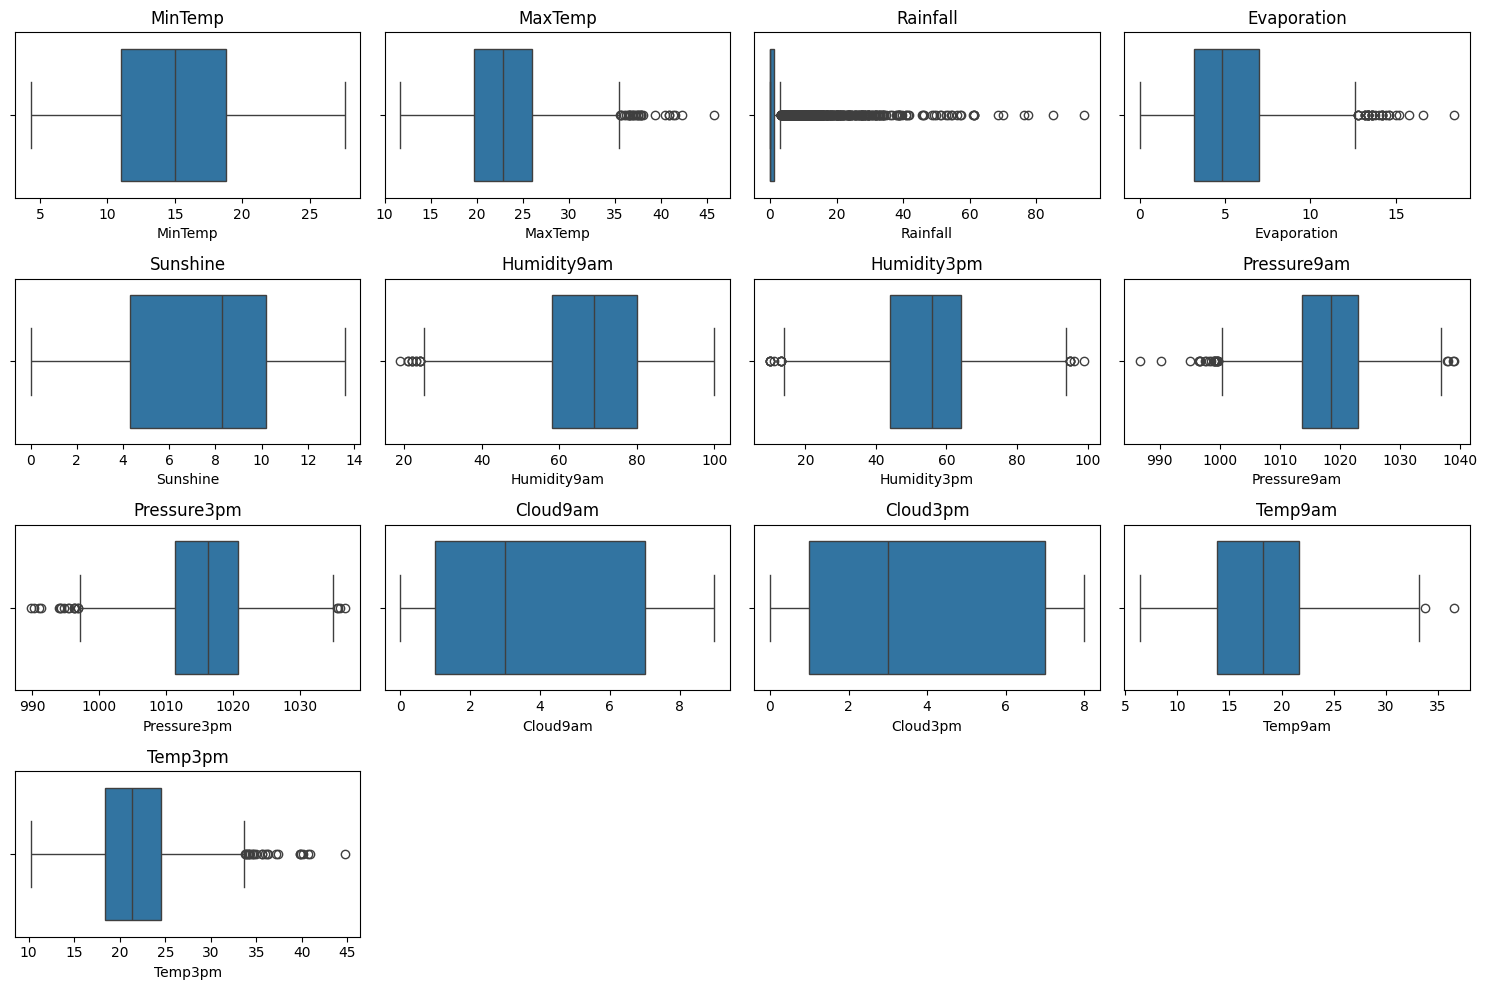

In [14]:
# Plot Boxplot for each feature to examine the Outlier in the features.
# Create a figure with a specified size (15 inches wide, 10 inches tall)
plt.figure(figsize=(15, 10)) 

# Iterate through each int64 and float64 column in the DataFrame 
for i,col in enumerate(df.select_dtypes(include=['float64','int64'])): 
     # Create a subplot in a 3x3 grid,
    plt.subplot(4,4,i+1)
    # Generate a boxplot
    sns.boxplot(x=col,data=df)
    # Set the title of the subplot to the column name
    plt.title(col)
# Adjust the spacing between subplots to prevent overlapping
plt.tight_layout()

# Display the figure with all the subplots
plt.show()

## remove outlier 

In [15]:
for column in df.select_dtypes(include=['float64','int64']):
    # Calculate the first quartile : 25th percentile
    Q1 = df[column].quantile(0.25)
    # Calculate the third quartile : 75th percentile
    Q3 = df[column].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1 
     # Calculate the lower bound for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    # Calculate the upper bound for outlier detection
    upper_bound = Q3 + 1.5 * IQR
    # Replace values below the lower bound with the lower bound
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    # Replace values below the lower bound with the upper bound
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

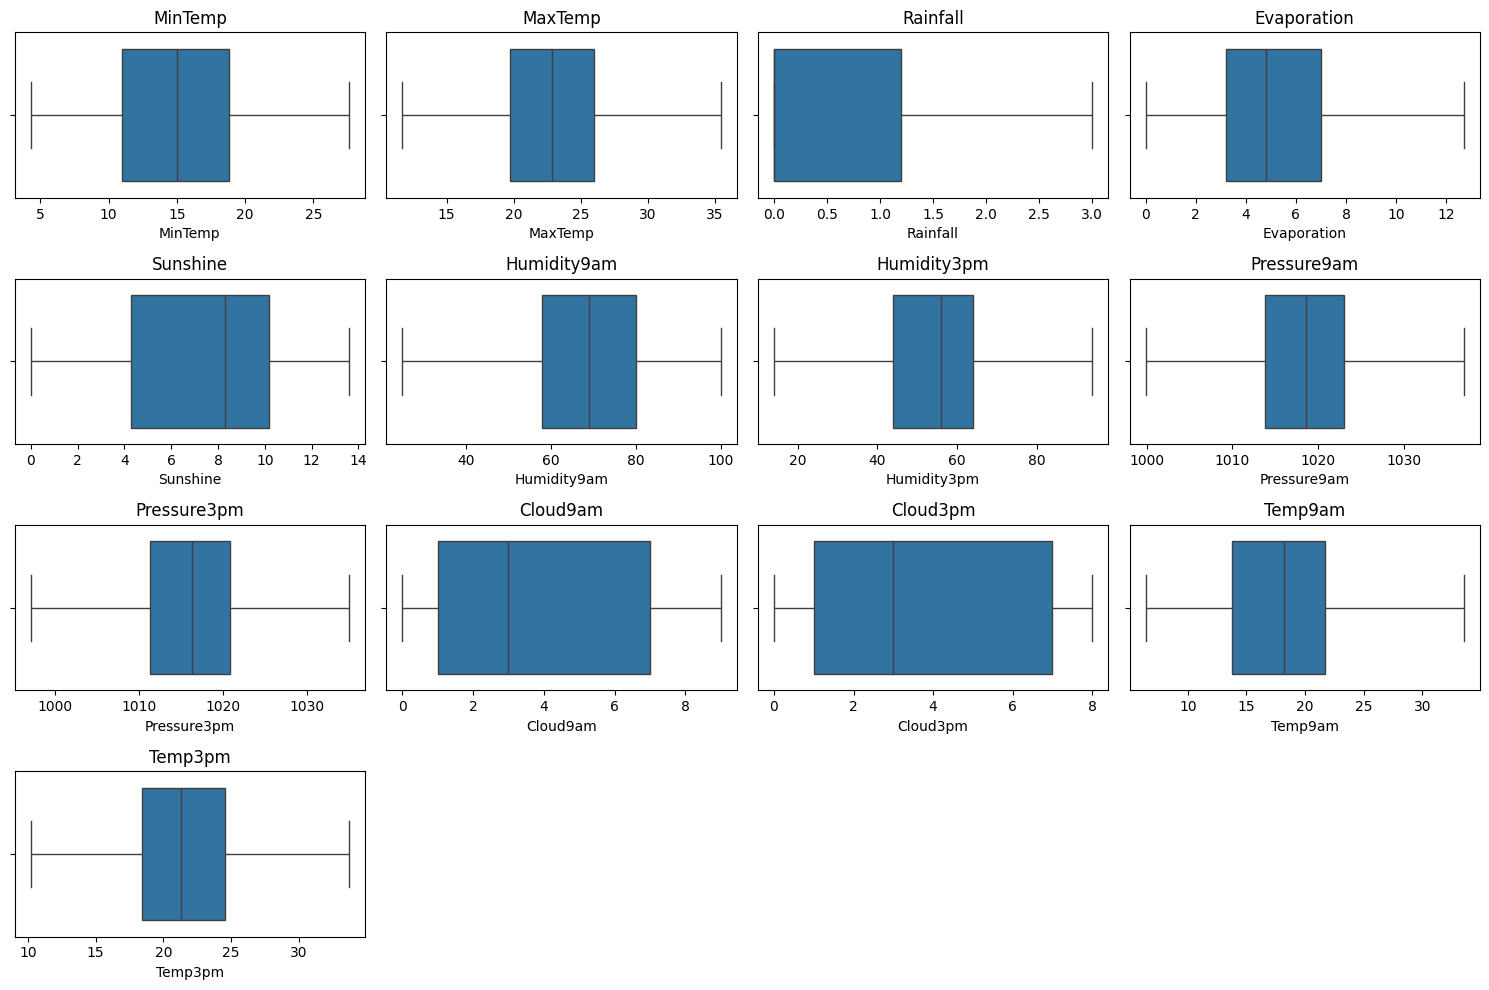

In [16]:
# Plot Boxplot for each feature to examine the Outlier in the features.
# Create a figure with a specified size (15 inches wide, 10 inches tall)
plt.figure(figsize=(15, 10)) 

# Iterate through each int64 and float64 column in the DataFrame 
for i,col in enumerate(df.select_dtypes(include=['float64','int64'])): 
     # Create a subplot in a 3x3 grid,
    plt.subplot(4,4,i+1)
    # Generate a boxplot
    sns.boxplot(x=col,data=df)
    # Set the title of the subplot to the column name
    plt.title(col)
# Adjust the spacing between subplots to prevent overlapping
plt.tight_layout()

# Display the figure with all the subplots
plt.show()

## convert classification values into numerical values

In [17]:
df=pd.get_dummies(data=df,columns=['RainToday','RainTomorrow'],drop_first=True,dtype=np.int64)

In [18]:
# change the column name 
df['RainToday'] = df['RainToday_Yes']
df['RainTomorrow'] = df['RainTomorrow_Yes']

In [19]:
# drop coulmn
df.drop('RainToday_Yes',axis=1,inplace=True)
df.drop('RainTomorrow_Yes',axis=1,inplace=True)

In [20]:
# Preprocess the data
# df['Date'] = pd.to_datetime(df['Date'])
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['Year'] = df['Date'].dt.year
# df.drop('Date', axis=1, inplace=True)
# df = pd.get_dummies(df, columns=['Month', 'Day', 'Year'])

In [21]:
# drop location and date , drop raintoday because it is same as rain fall after drop there is no effect on output
df = df.drop(['Date', 'Location','RainToday'], axis=1)

## to see the correlation between dependent and independent variables 

In [22]:
corr=df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.777090,0.021391,0.575502,-0.064941,0.056111,0.278304,-0.397547,-0.357436,0.208390,0.139183,0.939617,0.759953,0.085143
MaxTemp,0.777090,1.000000,-0.185783,0.516597,0.325467,-0.175490,-0.134407,-0.395534,-0.427883,-0.063066,-0.077043,0.862737,0.960576,-0.146703
Rainfall,0.021391,-0.185783,1.000000,-0.248303,-0.370067,0.416320,0.348030,0.007626,0.066528,0.277500,0.217653,-0.074877,-0.187058,0.356118
Evaporation,0.575502,0.516597,-0.248303,1.000000,0.179292,-0.398925,-0.101231,-0.347217,-0.303233,-0.017959,-0.020899,0.613006,0.483139,-0.069101
Sunshine,-0.064941,0.325467,-0.370067,0.179292,1.000000,-0.483817,-0.580286,-0.059399,-0.106975,-0.571829,-0.581003,0.113159,0.344041,-0.522939
Humidity9am,0.056111,-0.175490,0.416320,-0.398925,-0.483817,1.000000,0.653219,0.277724,0.264142,0.343019,0.256467,-0.143763,-0.146004,0.328534
Humidity3pm,0.278304,-0.134407,0.348030,-0.101231,-0.580286,0.653219,1.000000,0.162086,0.190818,0.371104,0.383866,0.137106,-0.196381,0.470635
Pressure9am,-0.397547,-0.395534,0.007626,-0.347217,-0.059399,0.277724,0.162086,1.000000,0.963865,0.009781,-0.017735,-0.424470,-0.351153,-0.027281
Pressure3pm,-0.357436,-0.427883,0.066528,-0.303233,-0.106975,0.264142,0.190818,0.963865,1.000000,0.027896,0.008370,-0.406530,-0.393904,0.014552
Cloud9am,0.208390,-0.063066,0.277500,-0.017959,-0.571829,0.343019,0.371104,0.009781,0.027896,1.000000,0.680795,0.084343,-0.064373,0.285422


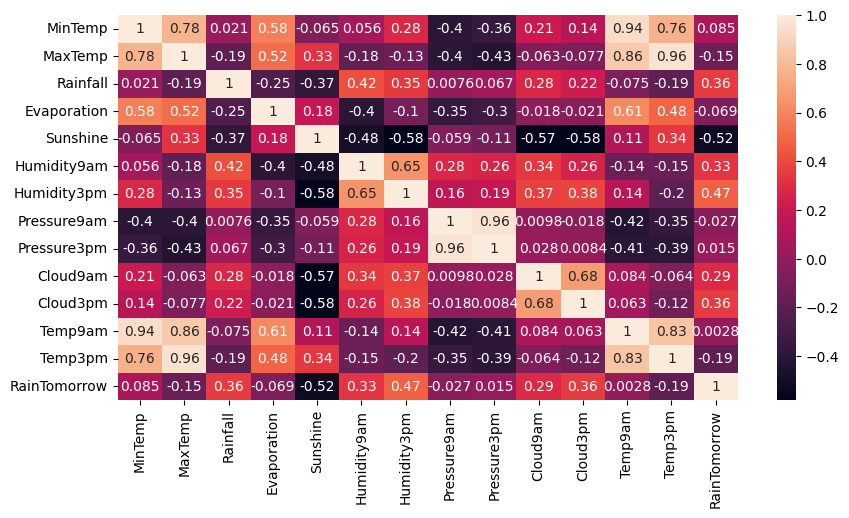

In [23]:
# heat map to see correlation
plt.figure(figsize=(10,5))
sns.heatmap(data=corr,annot=True)
plt.show()

In [24]:
x = df.drop(['RainTomorrow'],axis = 1)
y = df['RainTomorrow']

## Function for evaluate the model to see the 'Accuracy', 'Precision', 'Recall', 'F1'

In [25]:
def evaluate_model(y_test, y_train, y_test_pred, y_train_pred):
    """
    Evaluate a classification model.

    Args:
        y_test (pandas.Series): The test labels.
        y_train (pandas.Series): The train labels.
        y_test_pred (pandas.Series): The test predictions.
        y_train_pred (pandas.Series): The train predictions.

    Returns:
        pandas.DataFrame: A table of the evaluation metrics.
    """

    # Calculate the evaluation metrics
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    # Create a table of the evaluation metrics
    table = pd.DataFrame([
        [accuracy_test*100, precision_test*100, recall_test*100, f1_test*100],
        [accuracy_train*100, precision_train*100, recall_train*100, f1_train*100]
    ], columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=["Test", "Train"])
    table = table.apply(lambda x: round(x, 4))
    return table

# Logistic Regresssion

In [26]:
# initialize obejct for LogisticRegression class
lg = LogisticRegression()

In [27]:
# split the dataset into train and test dateset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# Define the parameter grid for alpha
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'sag', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5,scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best R-accuracy Score:{best_score}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best R-accuracy Score:0.8369579288025891

GridSearchCV tuning completed.


In [29]:
lg = LogisticRegression(**best_params)

In [30]:
# fit the data
lg.fit(x_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [31]:
# train test and train data
lg_train_pred = lg.predict(x_train)
lg_test_pred = lg.predict(x_test)

In [32]:
print(f"Coefficient is : {lg.coef_}")
print()
print(f"Intercept is : {lg.intercept_}")

Coefficient is : [[-0.19242678  0.09973621  0.36221812  0.08267347 -0.23480428  0.01290391
   0.04439161 -0.00546599 -0.00333642 -0.08675293  0.1078353   0.15102654
  -0.09674902]]

Intercept is : [4.94545405]


### Evaluate the model

In [33]:
lg_results = evaluate_model(y_test,y_train,lg_test_pred,lg_train_pred)

In [34]:
lg_results

,Accuracy,Precision,Recall,F1
Test,84.4720,82.8829,53.1792,64.7887
Train,84.1227,75.0529,54.9536,63.4495


In [35]:
# lg_results.iloc[1]["Accuracy"]

#### confusion_matrix

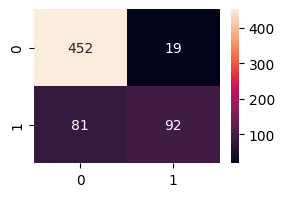

In [36]:
cf_lg=confusion_matrix(y_test,lg_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_lg,annot=True, fmt="d")
plt.show()

# KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
# Define the parameter grid for knn
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(x_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print(f"Best Parameters: {best_params_knn}")
print(f"Best Accuracy Score:{best_score_knn}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best Accuracy Score:0.8144456988033417

GridSearchCV tuning completed.


In [39]:
knn = KNeighborsClassifier(**best_params_knn)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [40]:
# Make predictions
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)

### Evaluate the model

In [41]:
# call evaluation fuction 
knn_results = evaluate_model(y_test,y_train,knn_test_pred,knn_train_pred)

In [42]:
knn_results

,Accuracy,Precision,Recall,F1
Test,83.0745,77.5862,52.0231,62.2837
Train,100.0000,100.0000,100.0000,100.0000


#### confusion_matrix

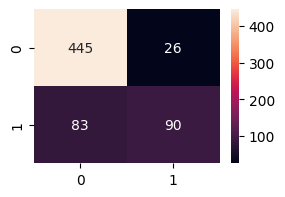

In [43]:
cf_knn=confusion_matrix(y_test,knn_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_knn,annot=True, fmt="d")
plt.show()

# DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier()

In [45]:
# Define the parameter grid for decison tree classifier
param_grid = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
grid_search_dtc = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid = param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_dtc.fit(x_train, y_train)

# Get the best parameters and best score
best_params_dtc = grid_search_dtc.best_params_
best_score_dtc = grid_search_dtc.best_score_
print(f"Best Parameters: {best_params_dtc}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}

GridSearchCV tuning completed.


In [46]:
# Initialize the DecisionTreeClassifier object 
dtc = DecisionTreeClassifier(random_state=42,**best_params_dtc)

In [47]:
# Train the data 
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [48]:
#Evaluate the performance of the trained DecisionTreeClassifier model on the scaled test data.
dtc.score(x_test, y_test)*100

82.91925465838509

In [49]:
# Make predictions
dtc_train_pred = dtc.predict(x_train)
dtc_test_pred = dtc.predict(x_test)

### Evaluate the model

In [50]:
# call evaluation fuction that define above 
dtc_results = evaluate_model(y_test,y_train,dtc_test_pred,dtc_train_pred)

In [51]:
dtc_results

,Accuracy,Precision,Recall,F1
Test,82.9193,82.4742,46.2428,59.2593
Train,84.5109,78.6543,52.4768,62.9526


#### confusion_matrix

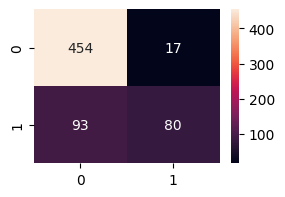

In [52]:
cf_dtc=confusion_matrix(y_test,dtc_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_dtc,annot=True, fmt="d")
plt.show()

# Ensemble Technique 

## RandomForestClassifier

In [53]:
random_forest = RandomForestClassifier()

In [54]:
# Tune the Random Forest Classifier by setting a parameter grid
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [7],
    'min_samples_split': [2,5],
    'min_samples_leaf': [4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best accuracy Score:{best_score_rf}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy Score:0.8342432452773387

GridSearchCV tuning completed.


In [55]:
# Initialize the RandomForestClassifier object 
random_forest = RandomForestClassifier(**best_params_rf,random_state=42)

In [56]:
# Train the Model 
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

In [57]:
#Evaluate the performance of the trained DecisionTreeclasifier model on the scaled test data.
random_forest.score(x_test, y_test)*100

84.00621118012423

In [58]:
# Make predictions
random_forest_train_pred = random_forest.predict(x_train)
random_forest_test_pred = random_forest.predict(x_test)

### Evaluate the model

In [59]:
# call evaluation fuction that define above 
rf_results = evaluate_model(y_test,y_train,random_forest_test_pred,random_forest_train_pred)

In [60]:
rf_results

,Accuracy,Precision,Recall,F1
Test,84.0062,86.4583,47.9769,61.7100
Train,87.3835,90.4282,55.5728,68.8399


#### confusion_matrix

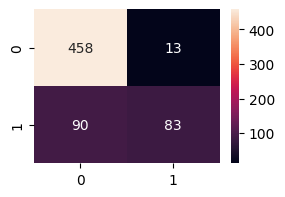

In [61]:
cf_rf=confusion_matrix(y_test,random_forest_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_rf,annot=True, fmt="d")
plt.show()

### Bagging with Random Forest 

In [62]:
# --- Random Forest with Grid Search ---
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_  

In [63]:
bagging_model = BaggingClassifier(estimator=best_rf_model,  # Use best RF model
                                 n_estimators=10, random_state=42)
bagging_model.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                   min_samples_leaf=4,
                                                   random_state=42),
                  random_state=42)

In [64]:
# Predictions bagging
bagging_pred_train = bagging_model.predict(x_train)
bagging_pred_test = bagging_model.predict(x_test)

In [65]:
# call evaluation fuction that define above 
rf_bag_results = evaluate_model(y_test,y_train,bagging_pred_test,bagging_pred_train)

In [66]:
rf_bag_results

,Accuracy,Precision,Recall,F1
Test,84.6273,87.7551,49.7110,63.4686
Train,86.4519,86.8486,54.1796,66.7302


### AdaBoost with Random Forest 

In [67]:
adaboost_model = AdaBoostClassifier(estimator=best_rf_model,  # Use best RF model
                                    n_estimators=50, random_state=42)
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                    min_samples_leaf=4,
                                                    random_state=42),
                   random_state=42)

In [68]:
# Predictions adaboost
adaboost_pred_train = adaboost_model.predict(x_train)
adaboost_pred_test = adaboost_model.predict(x_test)

In [69]:
# call evaluation fuction that define above 
rf_adaboost_results = evaluate_model(y_test,y_train,adaboost_pred_test,adaboost_pred_train)

In [70]:
rf_adaboost_results

,Accuracy,Precision,Recall,F1
Test,83.3851,78.9474,52.0231,62.7178
Train,100.0000,100.0000,100.0000,100.0000


## GradientBoostingClassifier

In [71]:
gb = GradientBoostingClassifier()

In [72]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100],
    'learning_rate': [0.1,0.05, 0.005],
    'max_depth': [3,5],
    'min_samples_split': [2,4],
    'min_samples_leaf': [2,4],
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_gb.fit(x_train, y_train)

# Get the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
print(f"Best Parameters: {best_params_gb}")
print(f"Best accuracy Score:{best_score_gb}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy Score:0.8373492887785053

GridSearchCV tuning completed.


In [73]:
# Initialize the Model object
gb = GradientBoostingClassifier(**best_params_gb,random_state=42)

In [74]:
# Train the Model
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=4,
                           random_state=42)

In [75]:
#Evaluate the performance of the trained Gradient Boosting model on the scaled test data.
gb.score(x_test, y_test)*100

84.93788819875776

In [76]:
# Make predictions
gb_train_pred = gb.predict(x_train)
gb_test_pred = gb.predict(x_test)

### Evaluate the model

In [77]:
# call evaluation fuction that define above 
gb_results = evaluate_model(y_test,y_train,gb_test_pred,gb_train_pred)

In [78]:
gb_results

,Accuracy,Precision,Recall,F1
Test,84.9379,85.8491,52.6012,65.233
Train,86.1025,84.6154,54.4892,66.290


#### confusion_matrix

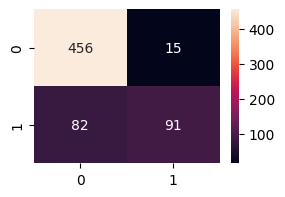

In [79]:
cf_gb=confusion_matrix(y_test,gb_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_gb,annot=True, fmt="d")
plt.show()

# naive_bayes

## GaussianNB

In [80]:
gnb = GaussianNB()

In [81]:
gnb.fit(x_train,y_train)

GaussianNB()

In [82]:
# Make predictions
gnb_train_pred = gnb.predict(x_train)
gnb_test_pred = gnb.predict(x_test)

### Evaluate the model

In [83]:
# call evaluation fuction that define above 
gnb_results = evaluate_model(y_test,y_train,gnb_test_pred,gnb_train_pred)

In [84]:
gnb_results

,Accuracy,Precision,Recall,F1
Test,82.2981,67.4556,65.8960,66.6667
Train,79.2702,57.4271,67.0279,61.8571


#### confusion_matrix

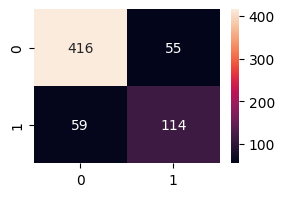

In [85]:
cf_gnb=confusion_matrix(y_test,gnb_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_gnb,annot=True, fmt="d")
plt.show()

In [86]:
# plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)

## BernoulliNB

In [87]:
bnb = BernoulliNB()

In [88]:
# Define the parameter grid for BernoulliNB
param_grid_bnb = {
    'alpha': range(1, 15, 2)
}

# Initialize GridSearchCV
grid_search_bnb = GridSearchCV(estimator=bnb, param_grid=param_grid_bnb, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_bnb.fit(x_train, y_train)

# Get the best parameters and best score
best_params_bnb = grid_search_bnb.best_params_
best_score_bnb = grid_search_bnb.best_score_
print(f"Best Parameters: {best_params_bnb}")
print(f"Best Accuracy Score: {best_score_bnb}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'alpha': 1}
Best Accuracy Score: 0.7798931286219613

GridSearchCV tuning completed.


In [89]:
bnb = BernoulliNB(**best_params_bnb)

In [90]:
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1)

In [91]:
# Make predictions
bnb_train_pred = bnb.predict(x_train)
bnb_test_pred = bnb.predict(x_test)

### Evaluate the model

In [92]:
# call evaluation fuction that define above 
bnb_results = evaluate_model(y_test,y_train,bnb_test_pred,bnb_train_pred)

In [93]:
bnb_results

,Accuracy,Precision,Recall,F1
Test,75.7764,74.2857,15.0289,25.0000
Train,77.9891,78.0142,17.0279,27.9543


#### confusion_matrix

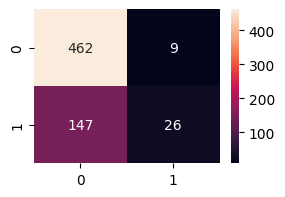

In [94]:
cf_bnb=confusion_matrix(y_test,bnb_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_bnb,annot=True, fmt="d")
plt.show()

## MultinomialNB

In [95]:
mnb = MultinomialNB()

In [96]:
# Define the parameter grid for BernoulliNB
param_grid_mnb = {
    'alpha': range(1, 15, 2)
}

# Initialize GridSearchCV
grid_search_mnb = GridSearchCV(estimator=mnb, param_grid=param_grid_bnb, cv=5,scoring='accuracy')

# Fit GridSearchCV
grid_search_mnb.fit(x_train, y_train)

# Get the best parameters and best score
best_params_mnb = grid_search_mnb.best_params_
best_score_mnb = grid_search_mnb.best_score_
print(f"Best Parameters: {best_params_mnb}")
print(f"Best accuracy Score:{best_score_mnb}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'alpha': 7}
Best accuracy Score:0.7767773011213969

GridSearchCV tuning completed.


In [97]:
mnb = MultinomialNB(**best_params_mnb)

In [98]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=7)

In [99]:
# Make predictions
mnb_train_pred = mnb.predict(x_train)
mnb_test_pred = mnb.predict(x_test)

### Evaluate the model

In [100]:
# call evaluation fuction that define above 
mnb_results = evaluate_model(y_test,y_train,mnb_test_pred,mnb_train_pred)

In [101]:
mnb_results

,Accuracy,Precision,Recall,F1
Test,82.1429,65.2632,71.6763,68.3196
Train,77.7562,54.2891,71.5170,61.7234


#### confusion_matrix

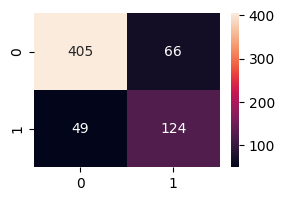

In [102]:
cf_mnb=confusion_matrix(y_test,mnb_test_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cf_mnb,annot=True, fmt="d")
plt.show()


# LinearDiscriminantAnalysis

In [103]:
lda = LinearDiscriminantAnalysis()

In [104]:
# Define the parameter grid for LDA
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

# Perform grid search cross-validation
grid_search_lda = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
# Fit the grid search model to the training data
grid_search_lda.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search_lda.best_params_)

# Get the best model
best_model_lda = grid_search_lda.best_estimator_

{'shrinkage': 'auto', 'solver': 'lsqr'}


In [105]:
# Evaluate the best model on the test data
y_test_lda = best_model_lda.predict(x_test)
y_train_lda = best_model_lda.predict(x_train)

### Evaluate the model

In [106]:
# call evaluation fuction that define above 
lda_results = evaluate_model(y_test,y_train,y_test_lda,y_train_lda)

In [107]:
lda_results

,Accuracy,Precision,Recall,F1
Test,84.6273,79.3651,57.8035,66.8896
Train,83.3075,70.6897,57.1207,63.1849


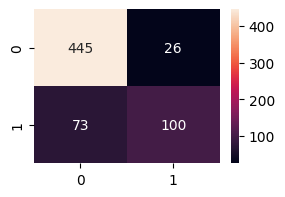

In [108]:
cf_lda=confusion_matrix(y_test,y_test_lda)
plt.figure(figsize=(3,2))
sns.heatmap(cf_lda,annot=True, fmt="d")
plt.show()

# Analysis of Classification Models Based on Accuracy and F1-Score

In [109]:
accuracies =  []
f1_scores = []
recall = []
precision = []
for temp_df in [lg_results,knn_results,dtc_results,rf_results,rf_bag_results,rf_adaboost_results,gb_results,gnb_results,bnb_results,mnb_results,lda_results]:
    accuracies.append(temp_df.loc["Test"]["Accuracy"])
    f1_scores.append(temp_df.loc["Test"]["F1"])
    recall.append(temp_df.loc["Test"]["Recall"])
    precision.append(temp_df.loc["Test"]["Precision"])

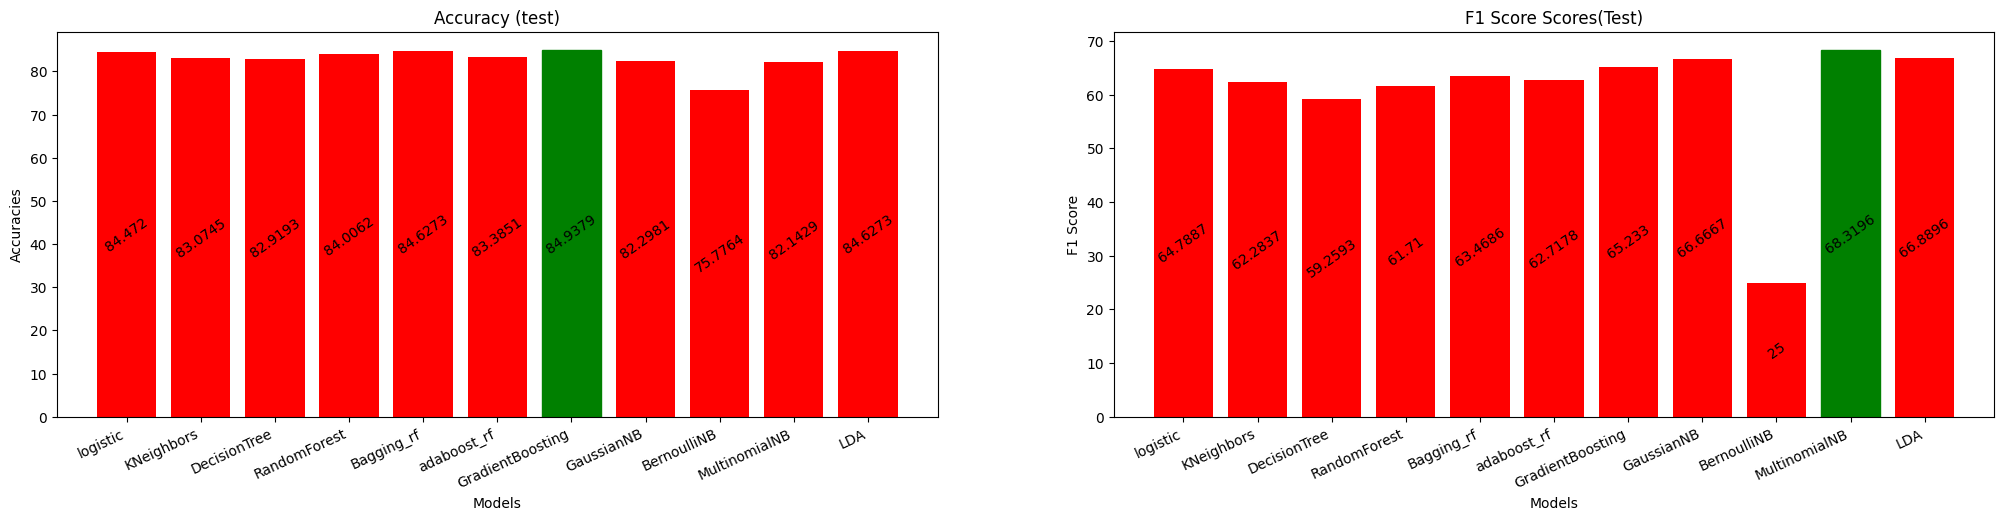

In [110]:
# Create a list of model names that is also mention in function  
models = ['logistic', 'KNeighbors','DecisionTree','RandomForest', 'Bagging_rf', 'adaboost_rf', 
               'GradientBoosting','GaussianNB','BernoulliNB','MultinomialNB','LDA']


# Create a DataFrame for Seaborn to plot bar chart 
model_data = pd.DataFrame({'Model': models, 'Accuracies': accuracies, 'f1_score': f1_score})

# Create the figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

# Plot Accuracy
bar_width = 0.6
ax1.bar(models, accuracies, color='red')
ax1.set_xlabel('Models',loc='center')
ax1.set_ylabel('Accuracies')
ax1.set_title('Accuracy (test)')
best_model_index = accuracies.index(max(accuracies))
ax1.patches[best_model_index].set_color('green')
for bar in ax1.containers:
    ax1.bar_label(bar, label_type='center',rotation=35)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=25, ha="right") 

# Plot F1 Score
ax2.bar(models, f1_scores, color='red')
ax2.set_xlabel('Models')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score Scores(Test)')
best_model_index = f1_scores.index(max(f1_scores))
ax2.patches[best_model_index].set_color('green')
for bar in ax2.containers:
    ax2.bar_label(bar, label_type='center',rotation=35)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha="right") 

plt.show()

Based on the ```accuracy scores``` 
GradientBoosting appears to be the best-performing model for your rainfall prediction project with an accuracy of 84.9379%.

Based on the F1 scores  the ```Multinomial Naive Bayes``` model appears to be the best-performing model with an F1 score of 68.31%. This indicates a good balance between precision and recall for this specific problem. 

# Analysis of Classification Models Based on recall and precision

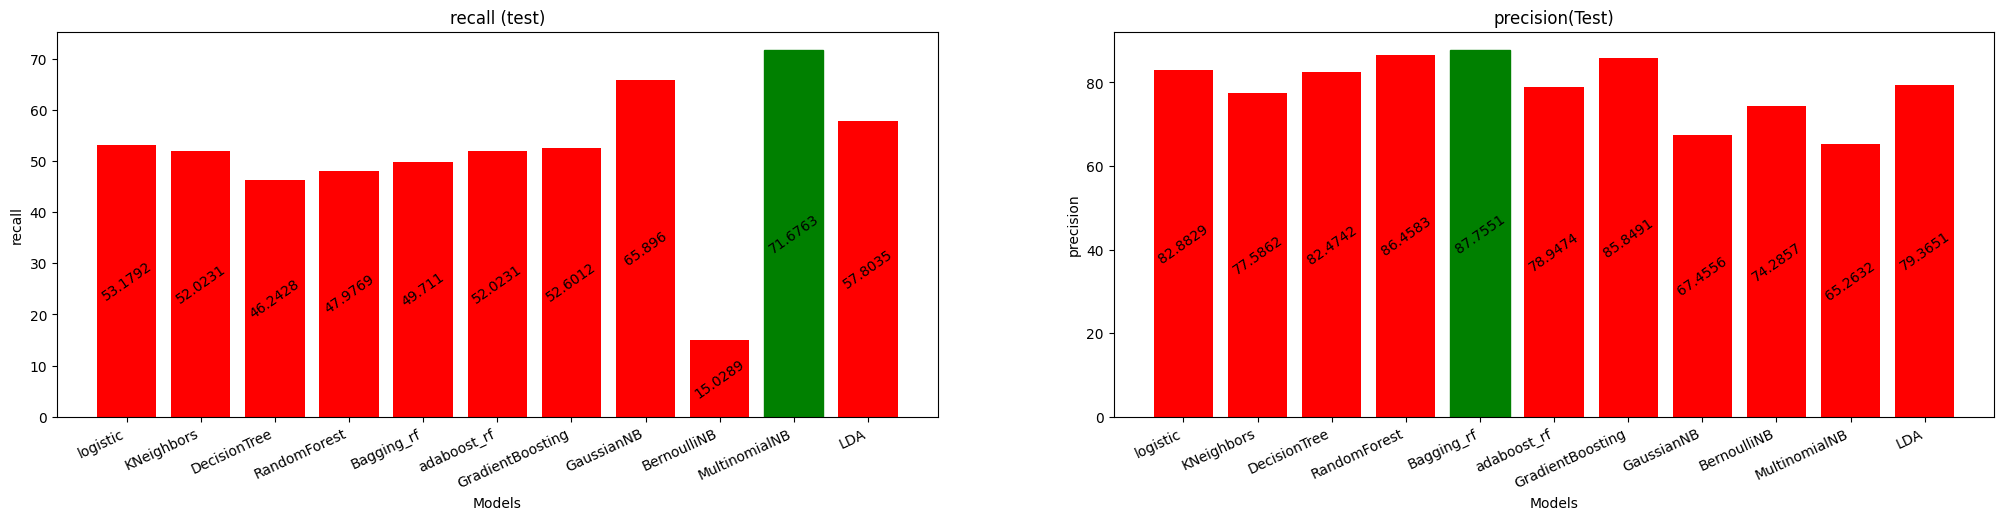

In [111]:
# Create a list of model names that is also mention in function  
models = ['logistic', 'KNeighbors','DecisionTree','RandomForest', 'Bagging_rf', 'adaboost_rf', 
               'GradientBoosting','GaussianNB','BernoulliNB','MultinomialNB','LDA']


# Create a DataFrame for Seaborn to plot bar chart 
model_data = pd.DataFrame({'Model': models, 'recall': recall, 'precision': precision})

# Create the figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

# Plot Recall
bar_width = 0.6
ax1.bar(models, recall, color='red')
ax1.set_xlabel('Models',loc='center')
ax1.set_ylabel('recall')
ax1.set_title('recall (test)')
best_model_index = recall.index(max(recall))
ax1.patches[best_model_index].set_color('green')
for bar in ax1.containers:
    ax1.bar_label(bar, label_type='center',rotation=35)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=25, ha="right") 

# Plot Precision
ax2.bar(models, precision, color='red')
ax2.set_xlabel('Models')
ax2.set_ylabel('precision')
ax2.set_title('precision(Test)')
best_model_index = precision.index(max(precision))
ax2.patches[best_model_index].set_color('green')
for bar in ax2.containers:
    ax2.bar_label(bar, label_type='center',rotation=35)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha="right") 

plt.show()

Based on the recall values  ```Multinomial Naive``` Bayes appears to be the best model with a recall score of 71.67%.

Based on the precision values you've provided, the ```Bagging with Random Forest (Bagging_rf)``` model demonstrates the best performance with a precision score of 87.75%.

#  Performance of Classifier Models on Correlation Features for Rainfall Prediction

### I selected only features that have a high correlation with the dependent variable RainTomorrow

- ```Correlation coefficients range from -1 to 1..```

- -1: Indicates a perfect negative correlation, meaning the variables move in opposite directions perfectly.
- 0: Indicates no correlation between the variables.
- 1: Indicates a perfect positive correlation, meaning the variables move in the same direction perfectly.

#### Correlation Analysis: Relationship Between Column and Dependent(RainTomorrow) Variable

In [112]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.777090,0.021391,0.575502,-0.064941,0.056111,0.278304,-0.397547,-0.357436,0.208390,0.139183,0.939617,0.759953,0.085143
MaxTemp,0.777090,1.000000,-0.185783,0.516597,0.325467,-0.175490,-0.134407,-0.395534,-0.427883,-0.063066,-0.077043,0.862737,0.960576,-0.146703
Rainfall,0.021391,-0.185783,1.000000,-0.248303,-0.370067,0.416320,0.348030,0.007626,0.066528,0.277500,0.217653,-0.074877,-0.187058,0.356118
Evaporation,0.575502,0.516597,-0.248303,1.000000,0.179292,-0.398925,-0.101231,-0.347217,-0.303233,-0.017959,-0.020899,0.613006,0.483139,-0.069101
Sunshine,-0.064941,0.325467,-0.370067,0.179292,1.000000,-0.483817,-0.580286,-0.059399,-0.106975,-0.571829,-0.581003,0.113159,0.344041,-0.522939
Humidity9am,0.056111,-0.175490,0.416320,-0.398925,-0.483817,1.000000,0.653219,0.277724,0.264142,0.343019,0.256467,-0.143763,-0.146004,0.328534
Humidity3pm,0.278304,-0.134407,0.348030,-0.101231,-0.580286,0.653219,1.000000,0.162086,0.190818,0.371104,0.383866,0.137106,-0.196381,0.470635
Pressure9am,-0.397547,-0.395534,0.007626,-0.347217,-0.059399,0.277724,0.162086,1.000000,0.963865,0.009781,-0.017735,-0.424470,-0.351153,-0.027281
Pressure3pm,-0.357436,-0.427883,0.066528,-0.303233,-0.106975,0.264142,0.190818,0.963865,1.000000,0.027896,0.008370,-0.406530,-0.393904,0.014552
Cloud9am,0.208390,-0.063066,0.277500,-0.017959,-0.571829,0.343019,0.371104,0.009781,0.027896,1.000000,0.680795,0.084343,-0.064373,0.285422


In [113]:
# Split the independent variables and dependent variable 
x_corr = df[['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am','Cloud3pm','Temp3pm']] # highly correlated column
y_corr = df['RainTomorrow']

### Define Function to Train and Evaluate Classifier Models Using Correlation Features

In [114]:
def train_model(x, y):
    models = ['logistic', 'KNeighbors','DecisionTree','RandomForest', 'Bagging_rf', 'adaboost_rf', 
               'GradientBoosting','GaussianNB','BernoulliNB','LDA']
    accuracies_corr = []
    f1_scores_corr = []
    recall_corr = []
    precision_corr = []

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initialize the Object of the class StandardScaler
    scaler = StandardScaler()

    # Perform Standard scaling on x_train and x_test dataset
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    
    for model_type in models:
        if model_type == 'logistic':
            model = LogisticRegression()
        elif model_type == 'KNeighbors':
            model = KNeighborsClassifier()
        elif model_type == 'DecisionTree':
            model = DecisionTreeClassifier()
        elif model_type == 'RandomForest':
            model = RandomForestClassifier()
        elif model_type == 'Bagging_rf':
            model = BaggingClassifier(estimator=RandomForestClassifier(random_state=42))
        elif model_type == 'adaboost_rf':
            model = AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42))
        elif model_type == 'GradientBoosting':
            model = GradientBoostingClassifier()
        elif model_type == 'GaussianNB':
            model = GaussianNB()
        elif model_type == 'BernoulliNB':
            model = BernoulliNB()
        elif model_type == 'LDA':
            model = LinearDiscriminantAnalysis()
        else:
            raise ValueError("Invalid model type. Choose from: 'logistic', 'KNeighbors', 'DecisionTree', 'RandomForest', 'Bagging_rf', 'adaboost_rf', 'GradientBoosting', 'GaussianNB', 'BernoulliNB', 'MultinomialNB', 'LDA'")

        param_grid = {}
        if model_type in ['GradientBoosting', 'RandomForest']:
            param_grid = {'n_estimators': [100, 200], 'max_depth': [2, 4], 'min_samples_split': [2, 5]}
        elif model_type in ['DecisionTree']:
            param_grid = {'max_depth': [2, 4], 'min_samples_split': [2, 5]}
        elif model_type == 'KNeighbors':
            param_grid = {'n_neighbors': [5, 10, 15], 'weights': ['uniform', 'distance']}
        elif model_type in ['LogisticRegression']:
            param_grid = {'C': range(10, 200, 10)}

        grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

        grid_search.fit(x_train_scaled, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        y_pred_test = best_model.predict(x_test_scaled)
        accuracy = best_model.score(x_test_scaled, y_test)

        precision_corr.append(precision_score(y_test, y_pred_test))
        recall_corr.append(recall_score(y_test, y_pred_test))
        f1_scores_corr.append(f1_score(y_test, y_pred_test))
        accuracies_corr.append(accuracy)

    return accuracies_corr, precision_corr, recall_corr, f1_scores_corr

In [115]:
accuracies_corr, precision_corr, recall_corr, f1_scores_corr = train_model(x_corr,y_corr)

/home/deepak/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deepak/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deepak/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deepak/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

#### Analysis of Classifier Models with Correlation Features on the basis of F1_score and Accuracy

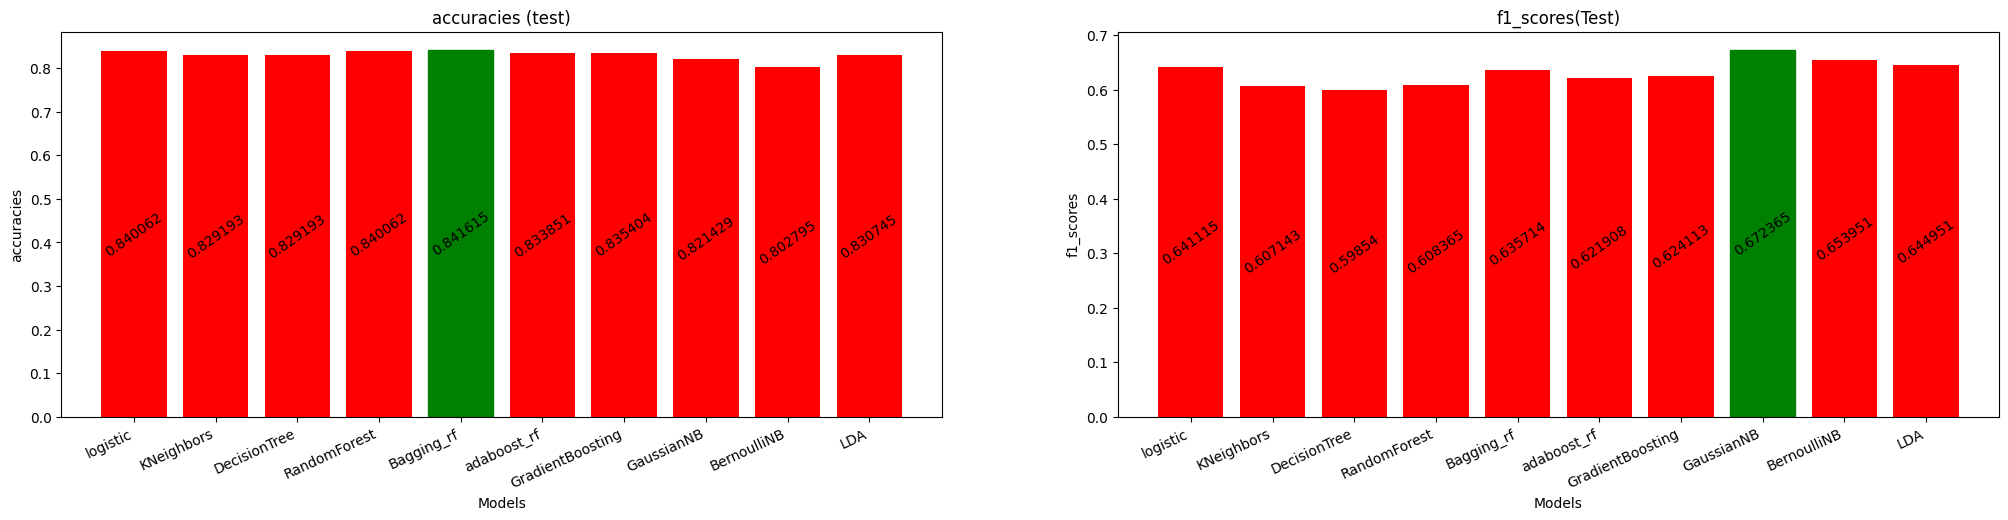

In [116]:
# Create a list of model names that is also mention in function  
models = ['logistic', 'KNeighbors','DecisionTree','RandomForest', 'Bagging_rf', 'adaboost_rf', 
               'GradientBoosting','GaussianNB','BernoulliNB','LDA'] #,'MultinomialNB'


# Create a DataFrame for Seaborn to plot bar chart 
model_data = pd.DataFrame({'Model': models, 'accuracies_corr': accuracies_corr, 'f1_scores_corr': f1_scores_corr})

# Create the figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

# Plot Accuracy
bar_width = 0.6
ax1.bar(models, accuracies_corr, color='red')
ax1.set_xlabel('Models',loc='center')
ax1.set_ylabel('accuracies')
ax1.set_title('accuracies (test)')
best_model_index = accuracies_corr.index(max(accuracies_corr))
ax1.patches[best_model_index].set_color('green')
for bar in ax1.containers:
    ax1.bar_label(bar, label_type='center',rotation=35)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=25, ha="right") 

# Plot F1 Score
ax2.bar(models, f1_scores_corr, color='red')
ax2.set_xlabel('Models')
ax2.set_ylabel('f1_scores')
ax2.set_title('f1_scores(Test)')
best_model_index = f1_scores_corr.index(max(f1_scores_corr))
ax2.patches[best_model_index].set_color('green')
for bar in ax2.containers:
    ax2.bar_label(bar, label_type='center',rotation=35)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha="right") 

plt.show()

### Model Performance: Accuracy Comparison

* Logistic Regression: 84% 
* K-Nearest Neighbors: 82.91%
* Decision Tree: 82.91%
* Random Forest: 84%
* Bagging with Random Forest: 84.41%(Best Performing Model) 
* AdaBoost with Random Forest: 82.91%
* Gradient Boosting: 83.54%
* Gaussian Naive Bayes: 82.14%
* Bernoulli Naive Bayes: 80.27%
* Linear Discriminant Analysis (LDA): 83.07%

**Analysis**

The **Bagging with Random Forest** model achieves the highest accuracy at **84.41%%**, making it the most accurate among the models tested for this rainfall prediction task.  


### Model Performance: F1-Scores

* Logistic Regression: 62.46%
* K-Nearest Neighbors: 59.79%
* Decision Tree: 59.79%
* Random Forest: 61.36%
* Bagging with Random Forest: 62.55%
* AdaBoost with Random Forest: 59.79%
* Gradient Boosting: 61.87%
* **Gaussian Naive Bayes: 67.23%** (Best Performing Model)
* Bernoulli Naive Bayes: 65.93%
* Linear Discriminant Analysis (LDA): 64.72%

**Analysis**

The **Gaussian Naive Bayes** model stands out with the highest F1-Score of **67.79%**. This suggests it achieves the best balance between precision and recall when compared to the other models tested.

**Gaussian Naive Bayes: A Closer Look**

Gaussian Naive Bayes is a probabilistic classifier that makes predictions based on Bayes' theorem. It assumes that the features are conditionally independent, given the class label. In this case, the "Gaussian" part indicates that the algorithm assumes features follow a Gaussian (normal) distribution. 

# Conclusion

## Scenario 1 : Model Training with All Features

### Model Comparison: F1-Score


Here's a comparison of F1-Scores for various models:

* Logistic Regression: 64.56%
* K-Nearest Neighbors: 61.81%
* Decision Tree: 59.26%
* Random Forest: 63.50%
* Bagging with Random Forest: 63.97%
* AdaBoost with Random Forest: 63.41%
* Gradient Boosting: 65.23%
* Gaussian Naive Bayes: 65.13%
* Bernoulli Naive Bayes: 56.16%
* **Multinomial Naive Bayes: 68.31%** (Best Performing Model)
* Linear Discriminant Analysis (LDA): 66.44%
* 
**Analysis:**

Based on the F1-scores, **Multinomial Naive Bayes** emerges as the best-performing model with an F1-score of **68.31%**. This indicates a good balance between precision and recall for rainfall prediction, suggesting that the model is effectively capturing relevant patterns in the data.


* **1.F1-score:** The F1-score is the harmonic mean of precision and recall.  It's a single metric that gives you a balanced view of how well your model is doing when you care about both minimizing false positives AND false negatives.

* **In rainfall prediction:** You want to avoid both:
    * False positives: Predicting heavy rain when there isn't any (could lead to unnecessary preparations).
    * False negatives: Missing actual heavy rainfall events (risk of damage, lack of preparedness)


### Model Performance:  Recall
* Logistic Regression: 52.60%
* K-Nearest Neighbors: 51.45%
* Decision Tree: 46.24%
* Random Forest: 50.29%
* Bagging with Random Forest: 50.29%
* AdaBoost with Random Forest: 52.60%
* Gradient Boosting: 52.60%
* Gaussian Naive Bayes: 65.32%
* Bernoulli Naive Bayes: 56.65%
* **Multinomial Naive Bayes: 71.67%** (Best Performing Model)
* Linear Discriminant Analysis (LDA): 57.23%

**Analysis: Focusing on Recall**

In rainfall prediction, especially when forecasting potentially hazardous events like heavy rainfall, **recall** is often a top priority. Recall measures the model's ability to correctly identify the positive cases.

### Model Selection:

Based on  analysis of both F1-score and recall, **Multinomial Naive Bayes** is the clear frontrunner for your rainfall prediction task. 

* **High Recall:** It excels at correctly identifying actual rainfall events (71.67% recall), which is crucial for minimizing potentially dangerous false negatives (predicting no rain when there will be).
* **Balanced Performance (F1-score):** It maintains a good balance between precision (avoiding false positives) and recall, resulting in the highest F1-score (68.31%) among the tested models. 

## Scenario 2: Model Training with Highly Correlated Features

### Model Performance: Accuracy Comparison

* Logistic Regression: 84% 
* K-Nearest Neighbors: 82.91%
* Decision Tree: 82.91%
* Random Forest: 84%
* Bagging with Random Forest: 84.41%(Best Performing Model) 
* AdaBoost with Random Forest: 82.91%
* Gradient Boosting: 83.54%
* Gaussian Naive Bayes: 82.14%
* Bernoulli Naive Bayes: 80.27%
* Linear Discriminant Analysis (LDA): 83.07%

**Analysis**

The **Bagging with Random Forest** model achieves the highest accuracy at **84.41%%**, making it the most accurate among the models tested for this rainfall prediction task.  
  

### Model Performance: F1-Scores

* Logistic Regression: 62.46%
* K-Nearest Neighbors: 59.79%
* Decision Tree: 59.79%
* Random Forest: 61.36%
* Bagging with Random Forest: 62.55%
* AdaBoost with Random Forest: 59.79%
* Gradient Boosting: 61.87%
* **Gaussian Naive Bayes: 67.79%** (Best Performing Model)
* Bernoulli Naive Bayes: 65.93%
* Linear Discriminant Analysis (LDA): 64.72%

**Analysis**

The **Gaussian Naive Bayes** model stands out with the highest F1-Score of **67.79%**. This suggests it achieves the best balance between precision and recall when compared to the other models tested.

**Gaussian Naive Bayes:**

Gaussian Naive Bayes is a probabilistic classifier that makes predictions based on Bayes' theorem. It assumes that the features are conditionally independent, given the class label. In this case, the "Gaussian" part indicates that the algorithm assumes features follow a Gaussian (normal) distribution. 

## Model Performance: Recall

* Logistic Regression: 51.45%
* K-Nearest Neighbors: 48.55%
* Decision Tree: 48.55%
* Random Forest: 46.82%
* Bagging with Random Forest: 49.71%
* AdaBoost with Random Forest: 48.55%
* Gradient Boosting: 49.71%
* **Gaussian Naive Bayes: 69.94%** (Best Performing Model)
* Bernoulli Naive Bayes: 69.36%
* Linear Discriminant Analysis (LDA): 57.80%

**Analysis: Prioritizing Recall for Rainfall Prediction**

Recall is a crucial metric for rainfall prediction, especially when you want to minimize the risk of missing heavy rainfall events (false negatives). A high recall indicates the model's effectiveness in correctly identifying the positive cases (days with rainfall, in this scenario).

**Gaussian Naive Bayes: A Strong Performer**

The **Gaussian Naive Bayes** model stands out with a recall of **69.94%**.  This suggests that it correctly identifies approximately 70 out of every 100 actual rainfall events, making it a strong candidate for your prediction system.

### Model Selection:

choose **Gaussian Naive Bayes**  for this rainfall prediction problem, as it demonstrates the best performance in terms of both accuracy and F1-score.

* **Gaussian Naive Bayes leads in both metrics:** 
    * It has the highest F1-score (67.79%), showing a good balance between precision and recall.
    * You mentioned it also has the highest accuracy among your models. 

* **Importance of both Accuracy and F1-score:**
    * **Accuracy** is a general measure of correctness, showing how often the model predicts correctly overall.
    * **F1-score** is crucial when you want to balance precision (avoiding false positives) and recall (avoiding false negatives), which is often desirable in classification problems.


### Q4: Best Model and Possible Reasons
Based on the evaluation results, the **Gaussian Naive Bayes** model emerged as the best-performing model for rainfall prediction. Possible reasons for its superior performance include:
* **Conditional Independence Assumption:** Gaussian Naive Bayes assumes that features are conditionally independent given the class label, which can align well with certain types of data, such as rainfall-related data.
* **Simplicity and Robustness:** Naive Bayes models are computationally efficient and tend to perform well even with limited data, making them less susceptible to overfitting.
* **Effective for Certain Data Patterns:** Gaussian Naive Bayes can excel when there's a clear separation between rainfall and non-rainfall instances based on the input features.
* **High Recall and F1-Score:** Gaussian Naive Bayes outperformed other models, including Random Forest, in terms of recall and F1-score, which are crucial metrics for rainfall prediction.


### Q5. What steps can you take to improve this selected model’s performance even further?
* **Hyperparameter Tuning:** Optimize the model's hyperparameters, such as the number of trees, tree depth, and minimum samples for splitting, to enhance performance.
* **Feature Selection:** Carefully select the most informative and relevant features to reduce noise and improve model interpretability.
* **Data Augmentation:** Create synthetic or duplicate data to augment the training dataset, especially for rare or underrepresented rainfall events.
* **Ensemble Techniques:** Explore other ensemble methods, such as Gradient Boosting, or combine Random Forest with other models to leverage their complementary strengths.